In [98]:
!pip install simpletransformers # for transformers wrapper for DL
!pip install ktrain # for ktrain wrapper for DL
!pip install nlpaug # for data augmantation
!pip install tqdm

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

In [99]:
import numpy as np
import pandas as pd

import json, sys, regex, os
import torch
import torchvision
import random
random.seed(2022)

from sklearn.model_selection import train_test_split
from tqdm import tqdm, trange
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import requests
import re 

import os
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from tqdm import tqdm


import nltk
from nltk.corpus import stopwords
from collections import Counter


import ktrain
from ktrain import text

from sklearn.utils import shuffle
from transformers import TFRobertaModel, RobertaConfig, RobertaTokenizerFast

import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as naf
from nlpaug.util import Action

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0"; 

%config InlineBackend.figure_format = 'retina'

**I just need Happines, Sad, Angry and Natural classies.**

## Take emotions from 1st data.
[Emotion Detection from Text Data](https://www.kaggle.com/pashupatigupta/emotion-detection-from-text)


In [100]:
tweet_emotions_1 = pd.read_csv('../input/emotion-detection-from-text/tweet_emotions.csv')
tweet_emotions_1.head(5)

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [101]:
tweet_emotions_1.sentiment.value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

In [102]:
happy_tweets_1   = tweet_emotions_1['content'][tweet_emotions_1['sentiment'] == 'happiness'].values.tolist()
sad_tweets_1     = tweet_emotions_1['content'][tweet_emotions_1['sentiment'] == 'sadness'].values.tolist()
neutral_tweets_1 = tweet_emotions_1['content'][tweet_emotions_1['sentiment'] == 'neutral'].values.tolist()
anger_tweets_1   = tweet_emotions_1['content'][tweet_emotions_1['sentiment'] == 'anger'].values.tolist()

In [103]:
len(happy_tweets_1), len(sad_tweets_1), len(neutral_tweets_1), len(anger_tweets_1)

(5209, 5165, 8638, 110)

## Take emotions from 2nd data.
[Emotion Dataset for Emotion Recognition Tasks](https://www.kaggle.com/parulpandey/emotion-dataset)


**sadness (0), joy (1), love (2), anger (3), fear (4).**

In [104]:
tweet_emotions_training_2   = pd.read_csv('../input/emotion-dataset/training.csv')
tweet_emotions_test_2       = pd.read_csv('../input/emotion-dataset/test.csv')
tweet_emotions_validation_2 = pd.read_csv('../input/emotion-dataset/validation.csv')

tweet_emotions_2 = pd.concat([tweet_emotions_training_2,tweet_emotions_test_2,tweet_emotions_validation_2])

In [105]:
labels = {0: 'sadness',
         1: 'joy',
         2: 'love',
         3: 'anger',
         4: 'fear'}

tweet_emotions_2['sentiment']    = tweet_emotions_training_2['label'].map(labels)
tweet_emotions_2.head()

,text,label,sentiment
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [106]:
tweet_emotions_2.sentiment.value_counts()

joy        6766
sadness    5754
anger      2695
fear       2409
love       1650
Name: sentiment, dtype: int64

In [107]:
happy_tweets_2   = tweet_emotions_2['text'][tweet_emotions_2['sentiment'] == 'joy'].values.tolist()
sad_tweets_2     = tweet_emotions_2['text'][tweet_emotions_2['sentiment'] == 'sadness'].values.tolist() 
angr_tweets_2    = tweet_emotions_2['text'][tweet_emotions_2['sentiment'] == 'anger'].values.tolist() 
# natural_tweets_2 = tweet_emotions_2['text'][tweet_emotions_2['sentiment'] == 'fear'].values.tolist()                  

In [108]:
len(happy_tweets_2), len(sad_tweets_2), len(angr_tweets_2)

(6766, 5754, 2695)

## Take emotions from 3rd data.
[Emotions dataset for NLP](https://www.kaggle.com/praveengovi/emotions-dataset-for-nlp)

<!-- sadness (0), joy (1), love (2), anger (3), fear (4). -->

In [109]:
tweet_emotions_training_3 = pd.read_csv("/kaggle/input/emotions-dataset-for-nlp/train.txt", delimiter=';', header=None, names=['sentence','label'])
tweet_emotions_test_3 = pd.read_csv("/kaggle/input/emotions-dataset-for-nlp/test.txt", delimiter=';', header=None, names=['sentence','label'])
tweet_emotions_validation_3 = pd.read_csv("/kaggle/input/emotions-dataset-for-nlp/val.txt", delimiter=';', header=None, names=['sentence','label'])

tweet_emotions_3 = pd.concat([tweet_emotions_training_3,tweet_emotions_test_3,tweet_emotions_validation_3])
tweet_emotions_3.head()

,sentence,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [110]:
tweet_emotions_3.label.value_counts()

joy         6761
sadness     5797
anger       2709
fear        2373
love        1641
surprise     719
Name: label, dtype: int64

In [111]:
happy_tweets_3   = tweet_emotions_3['sentence'][tweet_emotions_3['label'] == 'joy'].values.tolist()
sad_tweets_3     = tweet_emotions_3['sentence'][tweet_emotions_3['label'] == 'sadness'].values.tolist() 
angr_tweets_3    = tweet_emotions_3['sentence'][tweet_emotions_3['label'] == 'anger'].values.tolist() 
# angr_tweets_3 = tweet_emotions_3['sentence'][tweet_emotions_3['label'] == 'fear'].values.tolist()                  

In [112]:
len(happy_tweets_3), len(sad_tweets_3), len(angr_tweets_3)

(6761, 5797, 2709)

## Compining all in one DataFrame

In [113]:
happy_tweets , sad_tweets , angr_tweets, natural_tweets = [], [], [] , []

happy_tweets   = happy_tweets_1 + happy_tweets_2 + happy_tweets_3
sad_tweets     = sad_tweets_1   + sad_tweets_2   + sad_tweets_3
anger_tweets    = anger_tweets_1  + angr_tweets_2  + angr_tweets_3 
neutral_tweets = neutral_tweets_1


len(happy_tweets), len(sad_tweets), len(anger_tweets), len(neutral_tweets)

(18736, 16716, 5514, 8638)

In [114]:
# maka list for all emotions and also list of labels for each label with fixied number of tweets for his list
all_labels = [['happy'], ['sad'], ['anger'], ['neutral']]
all_tweets = [happy_tweets, sad_tweets, anger_tweets,neutral_tweets]

tweets = []
labels = []

for idx, label in enumerate(all_tweets):
    curr_size = len(all_tweets[idx])
    curr_label = all_labels[idx]
    tweets += all_tweets[idx]
    labels +=  curr_label * curr_size
    print(curr_label, curr_size)
    

['happy'] 18736
['sad'] 16716
['anger'] 5514
['neutral'] 8638


In [115]:
# both have the same lenght
len(tweets), len(labels)

(49604, 49604)

In [116]:
emotion_df = pd.DataFrame({'tweets': tweets,
                          'labels': labels})

# shuffel data 
emotion_df = emotion_df.sample(frac=1).reset_index(drop=True)

emotion_df.head()

,tweets,labels
0,@BuffaloLass87 I'm so sorry do you want me to...,sad
1,Just left Brooklyn going uptown for some latin...,neutral
2,@88michael this my new more private acc. Will ...,neutral
3,i feel sad for her,sad
4,i really am feeling so impatient,anger


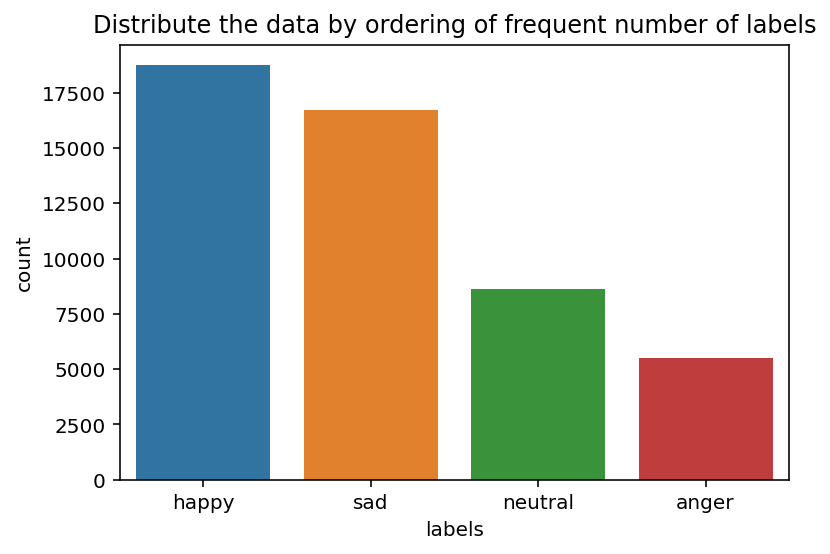

In [117]:
# distribute the data by ordering of frequent number of labels

sns.countplot(data = emotion_df, x = 'labels',
             order = emotion_df['labels'].value_counts().index)
plt.title('Distribute the data by ordering of frequent number of labels')
plt.show();

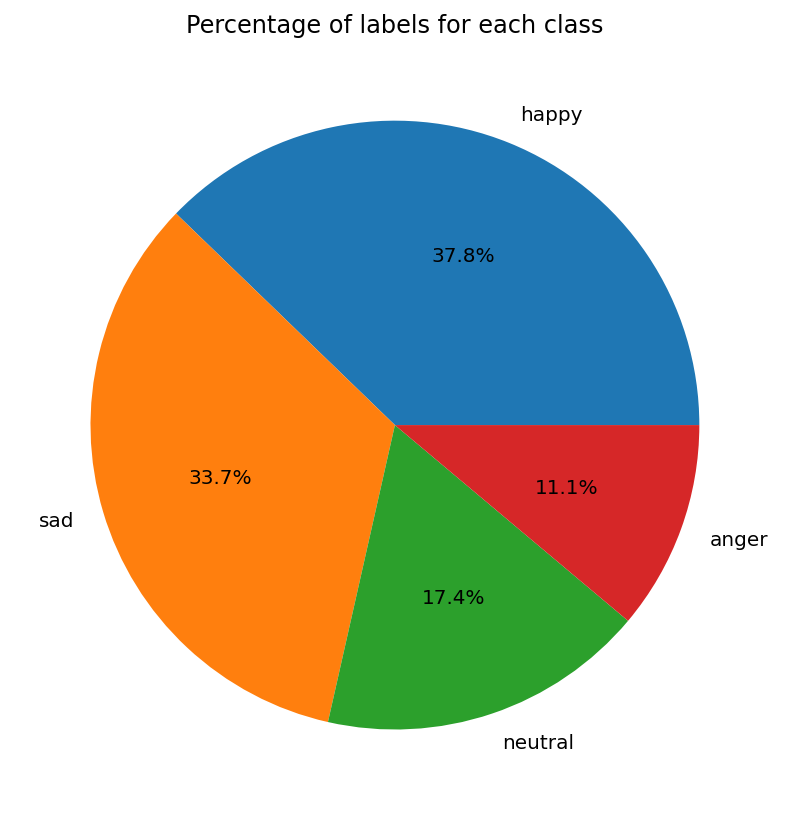

In [118]:
labels=emotion_df['labels'].value_counts().index
values=emotion_df['labels'].value_counts().values

#visualization
plt.figure(figsize=(7,7))
plt.pie(values ,labels = labels ,autopct='%1.1f%%')
plt.title('Percentage of labels for each class')
plt.show()

### Data Augmentaion

In [119]:
pd.DataFrame(emotion_df.labels.value_counts())

,labels
happy,18736
sad,16716
neutral,8638
anger,5514


**the `Happy` label is the dominated so i need to make all other labels with the same number of happy label have.**

In [120]:
number_of_samples_sad_need     = 18736 - 16716
number_of_samples_neutral_need = 18736 - 8638
number_of_samples_anger_need   = 18736 - 5514

print(number_of_samples_sad_need, number_of_samples_neutral_need, number_of_samples_anger_need)

2020 10098 13222


In [121]:
# BERT Augmentator
TOPK=20 #default=100
ACT = 'insert' #"substitute"

aug_bert = naw.ContextualWordEmbsAug(
    model_path='distilbert-base-uncased', 
    device='cuda',
    action=ACT, top_k=TOPK)

In [122]:
def augment_text(df, augmenter, label, samples=100, pr=0.2, show = 0):
    '''
        This function will return a new DataFrame which is have augmented data with his label
    '''
    augmenter.aug_p = pr
    new_text=[]
    
    # selecting the minority class samples
    df_n = df[df.labels==label].reset_index(drop=True)

    # data augmentation loop
    for i in tqdm(np.random.randint(0, len(df_n), samples)):
            text = df_n.iloc[i]['tweets']
            augmented_text = augmenter.augment(text)
            if show:
                print(f"The original text: {text}\nThe new one: {augmented_text}" )
                print(f"The label is {label}")
                print('-'*50)
            new_text.append(augmented_text)
    
    
    # dataframe
    new_df = pd.DataFrame({'tweets':new_text,'labels':label})
#     df = shuffle(df.append(new).reset_index(drop=True))
    
    # shuffel data 
#     df = new.sample(frac=1).reset_index(drop=True)

    
    return new_df


**Seeing some some samples.**

In [123]:
emotion_df.shape

(49604, 2)

In [124]:
# test_aug = augment_text(aug_data, aug_bert, label= 'sarcastic', samples=20, show = 1)
test_aug = augment_text(emotion_df, aug_bert, label= 'sad', samples=20, show = 1)

 15%|█▌        | 3/20 [00:00<00:00, 23.96it/s]

The original text: i feel like i have to make the suffering i m seeing mean something
The new one: i feel like i already have to make down the actual suffering i m seeing mean something
The label is sad
--------------------------------------------------
The original text: i get bored i get scared i feel ignored i feel happy i get silly i choke on my own words i make wishes i have dreams and i still want to believe anything can happen in this world for an ordinary girl a class profile link href http www
The new one: once i get bored until i get scared i feel ignored i feel happy i get silly i choke on my own silly words i make wishes i have beautiful dreams fulfilled and i still want to believe absolutely anything can happen in this world for such an ordinary girl getting a year class x profile link href http www
The label is sad
--------------------------------------------------
The original text: i suppose i ended up feeling that some of these clues were a bit too clever for their own

 55%|█████▌    | 11/20 [00:00<00:00, 32.93it/s]

The original text: That poor girl on britains got talent, god love her  forgot the words and cried  but gets a second chance to perform again : ]
The new one: that poor gypsy girl back on britains choir got talent, god love helps her forgot the words together and cried but gets a precious second chance to perform again : ]
The label is sad
--------------------------------------------------
The original text: i have no idea why i was feeling so lethargic yesterday probably because i got a bit dehydrated
The new one: i probably have no further idea why when i was feeling quite so lethargic yesterday probably because recently i got a bit dehydrated
The label is sad
--------------------------------------------------
The original text: @robineccles Indeed I did get your song however am unable to listen.
The new one: @ rob robineccles may indeed think i did get your song however they am unable to listen.
The label is sad
--------------------------------------------------
The original text: L

 75%|███████▌  | 15/20 [00:00<00:00, 29.63it/s]

The original text: i know how you feel i m sorry you feel like that
The new one: because i know how you feel i u m sorry you can feel like that
The label is sad
--------------------------------------------------
The original text: i dont want to always be judgmental of particular men or scenarios that i often see in this area but with so much trafficking forced sex work and what basically amounts to slavery its hard not to feel slightly embittered and disillusioned
The new one: i dont want to always be judgmental of particular bad men cases or scenarios that anybody i often see in this area anywhere but with it so much drug trafficking forced sex work done and what basically inevitably amounts to slavery its hard not to disturb feel im slightly embittered and disillusioned
The label is sad
--------------------------------------------------
The original text: @howardlindzon You're such a kiss ass   Looking forward to central, mountain and pacific mother's day tweets.  Don't forget about

 95%|█████████▌| 19/20 [00:00<00:00, 30.90it/s]

The original text: im feeling sentimental so ive decided to make a list of some of the things ill miss most
The new one: im only feeling sentimental so ive decided so to make a list full of these some of the things ill miss most
The label is sad
--------------------------------------------------


100%|██████████| 20/20 [00:00<00:00, 29.65it/s]

The original text: @AZamann hah eeee, although understandable.. i need a new picture for this thing.. but i'm all sweaty
The new one: @ o azamann hah eeee, rude although understandable.. i really need a new picture for showing this damn thing.. but i'm all getting sweaty
The label is sad
--------------------------------------------------


In [125]:
test_aug.head()

,tweets,labels
0,i feel like i already have to make down the ac...,sad
1,once i get bored until i get scared i feel ign...,sad
2,i suppose... i ended up feeling that some kind...,sad
3,i have not conducted quite a survey thoroughly...,sad
4,may i even feel that he is still feel gloomy a...,sad


In [126]:
test_aug.shape

(20, 2)

In [127]:
print(number_of_samples_sad_need, number_of_samples_neutral_need, number_of_samples_anger_need)

2020 10098 13222


In [128]:
%%time
augmantated_sad_df = augment_text(emotion_df, aug_bert, label= 'sad', samples=number_of_samples_sad_need)
augmantated_sad_df.head()

100%|██████████| 2020/2020 [00:57<00:00, 35.41it/s]

CPU times: user 56.9 s, sys: 158 ms, total: 57.1 s
Wall time: 57.1 s


,tweets,labels
0,i truly am even not able to keep in constant t...,sad
1,i feel so ashamed that i hardly cant quite pro...,sad
2,i feel ungrateful for myself complaining but i...,sad
3,presenter greg pritchard once was seriously ro...,sad
4,i im feeling weepy already,sad


In [129]:
%%time
augmantated_neutral_df = augment_text(emotion_df, aug_bert, label= 'neutral', samples=number_of_samples_neutral_need)
augmantated_neutral_df.head()

100%|██████████| 10098/10098 [04:24<00:00, 38.15it/s]

CPU times: user 4min 22s, sys: 891 ms, total: 4min 23s
Wall time: 4min 24s


,tweets,labels
0,its so obvious holly will go crashing thru up ...,neutral
1,@ ddlovato since obviously living in northern ...,neutral
2,i almost found out thro mama,neutral
3,@ bellisma can anyone we begin please?,neutral
4,@ alt stephyanime say yeah,neutral


In [130]:
%%time
augmantated_anger_df = augment_text(emotion_df, aug_bert, label= 'anger', samples=number_of_samples_anger_need)
augmantated_anger_df.head()

100%|██████████| 13222/13222 [06:11<00:00, 35.60it/s]

CPU times: user 6min 10s, sys: 1.14 s, total: 6min 11s
Wall time: 6min 11s


,tweets,labels
0,i feel god can hardly be far even more dangero...,anger
1,but i can stop feeling jealous,anger
2,i am your friend then... why then do i sometim...,anger
3,i feel vaguely almost utterly outraged that su...,anger
4,i always feel so grouchy awake and irritable w...,anger


In [131]:
print(number_of_samples_sad_need, number_of_samples_neutral_need, number_of_samples_anger_need)
print(len(augmantated_sad_df), len(augmantated_neutral_df), len(augmantated_anger_df))

2020 10098 13222
2020 10098 13222


**Merge augmented data into the original one**

In [132]:
new_emotion_df = pd.concat([emotion_df, augmantated_sad_df, augmantated_neutral_df, augmantated_anger_df], ignore_index=True)
new_emotion_df.head() 


,tweets,labels
0,@BuffaloLass87 I'm so sorry do you want me to...,sad
1,Just left Brooklyn going uptown for some latin...,neutral
2,@88michael this my new more private acc. Will ...,neutral
3,i feel sad for her,sad
4,i really am feeling so impatient,anger


**The summation of new data and original one is thesame number of rows**

In [133]:
print(len(emotion_df) + len(augmantated_sad_df) + len(augmantated_neutral_df) + len(augmantated_anger_df))
print(new_emotion_df.shape[0])

74944
74944


**After that we need to shuffel the data.**

In [134]:
new_emotion_df = new_emotion_df.sample(frac=1).reset_index(drop=True)
new_emotion_df.head()

,tweets,labels
0,i need to know that it can be fixed and that i...,happy
1,watching boxing and waiting crowds to go out t...,neutral
2,i feel so ungrateful for the things he does re...,sad
3,i also intended to study but that didn t happe...,happy
4,"Not looking forward to next week: Maths, Geogr...",sad


In [135]:
new_emotion_df.tail(5)

,tweets,labels
74939,Is wondering what happened to the sun? Damn Ma...,sad
74940,ill i just have to make some local friends i c...,anger
74941,i felt out of control i hated myself for feeli...,anger
74942,i am feeling utterly uncertain about anything ...,anger
74943,im really sleepy and i want to go to bed...but...,sad


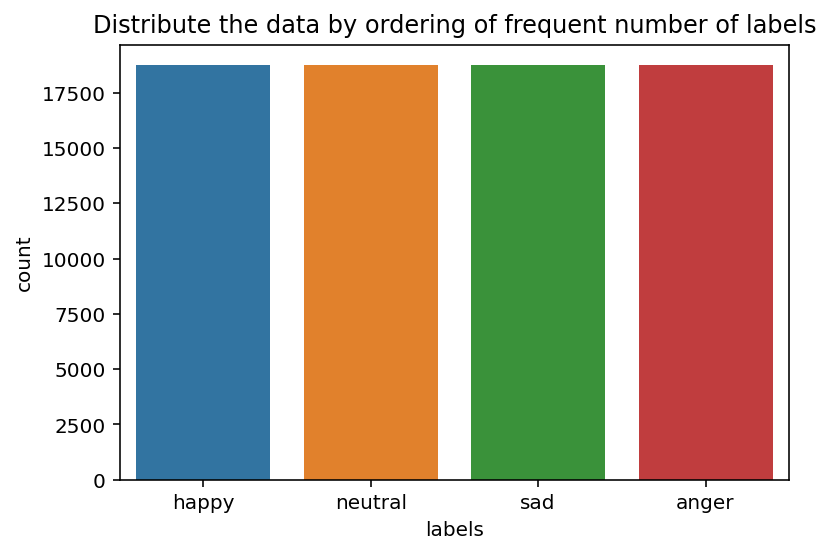

In [136]:
# The distribute of new data
sns.countplot(data = new_emotion_df, x = 'labels',
             order = new_emotion_df['labels'].value_counts().index)
plt.title('Distribute the data by ordering of frequent number of labels')
plt.show();

## Data Wrangling

### Make some text-preprocessing

In [137]:
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations
english_words = set(nltk.corpus.words.words())
    
def remove_emojis(text):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', text)


# remove non english words
def remove_non_english(text):
    return " ".join(w.lower() for w in nltk.wordpunct_tokenize(text) if w.lower() in english_words or not w.isalpha())


def clean_text(text):
    '''
        Make text lowercase, remove text in square brackets,remove links,remove punctuation
        and remove words containing numbers.
    '''

    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"

    text = re.sub('https?://\S+|www\.\S+', '', text)                # remove urls
    text = re.sub('<.*?>+', '', text)                               # remove tages
    text = re.sub(r'@[^\s]+', ' ', text)                            # Removing @user
    text = re.sub(r'#([^\s]+)', r'\1', text)                        # remove hashtage #word
    text = re.sub('[%s]' % re.escape(punctuations_list), '', text)  # remove punctuation
    text = re.sub('\n', '', text)                                   # remove new line
    text = re.sub(r'\s+', ' ', text)                                # Removing multiple spaces
    text = re.sub(sequencePattern, seqReplacePattern, text)         # Replace 3 or more consecutive letters by 2 letter.
    return text


def preprocess_data(text):
    
    # Clean puntuation, urls, and so on
    text = clean_text(text)

    # Remove emojis
    text = remove_emojis(text)

    # Normalize the text 
    text = remove_non_english(text)
    return text


In [138]:
new_emotion_df['clean_tweets'] = new_emotion_df['tweets'].apply(preprocess_data)
new_emotion_df.head()

,tweets,labels,clean_tweets
0,i need to know that it can be fixed and that i...,happy,i need to know that it can be fixed and that i...
1,watching boxing and waiting crowds to go out t...,neutral,watching boxing and waiting to go out to tonig...
2,i feel so ungrateful for the things he does re...,sad,i feel so ungrateful for the he does regularly...
3,i also intended to study but that didn t happe...,happy,i also intended to study but that t happen eit...
4,"Not looking forward to next week: Maths, Geogr...",sad,not looking forward to next week geography and 7


**Merge original data and augmented in one emotion data**

## Modeling

In [139]:
new_emotion_df.shape

(74944, 3)

In [140]:
# traning 80%, testing 20%
train_df, test_df = train_test_split(new_emotion_df.loc[:, ['clean_tweets', 'labels']], test_size=0.2, random_state=2022)
len(train_df), len(test_df)

(59955, 14989)

In [141]:
# testing 50%, validation 50% -> from the whole testing data which is 40% of the whole data
test_df, eval_df = train_test_split(test_df, test_size=0.5)
len(test_df), len(eval_df)

(7494, 7495)

In [142]:
len(train_df), len(test_df), len(eval_df)

(59955, 7494, 7495)

In [143]:
classes = list(set(new_emotion_df.labels))
classes

['happy', 'neutral', 'anger', 'sad']

### [Distilbert-base-uncased-emotion Model](https://huggingface.co/bhadresh-savani/distilbert-base-uncased-emotion?text=I+like+you.+I+love+you)

In [144]:
%%time

MODEL_NAME = 'distilbert-base-uncased'
t = text.Transformer(MODEL_NAME, maxlen=500, class_names = classes)
trn = t.preprocess_train(train_df.clean_tweets.values.tolist(), train_df.labels.values.tolist())
val = t.preprocess_test(eval_df.clean_tweets.values.tolist(), eval_df.labels.values.tolist())
distilbert_model = t.get_classifier()
distilbert_learner = ktrain.get_learner(distilbert_model, train_data=trn, val_data=val, batch_size=6)
distilbert_learner.fit_onecycle(5e-5, 4)
distilbert_learner.validate(class_names=classes) # class_names must be string values

preprocessing train...
language: en
train sequence lengths:
	mean : 16
	95percentile : 36
	99percentile : 48


/opt/conda/lib/python3.7/site-packages/ktrain/utils.py:621: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  if self.get_classes(): warnings.warn('class_names argument was ignored, as they were extracted from string labels in dataset')


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 16
	95percentile : 37
	99percentile : 50




begin training using onecycle policy with max lr of 5e-05...
Epoch 1/4
9993/9993 [==============================] - 2293s 227ms/step - loss: 0.6565 - accuracy: 0.7484 - val_loss: 0.5784 - val_accuracy: 0.7781
Epoch 2/4
9993/9993 [==============================] - 2278s 227ms/step - loss: 0.5122 - accuracy: 0.8115 - val_loss: 0.5022 - val_accuracy: 0.8129
Epoch 3/4
9993/9993 [==============================] - 2277s 227ms/step - loss: 0.3949 - accuracy: 0.8618 - val_loss: 0.4603 - val_accuracy: 0.8370
Epoch 4/4
9993/9993 [==============================] - 2278s 227ms/step - loss: 0.2181 - accuracy: 0.9295 - val_loss: 0.5201 - val_accuracy: 0.8428
              precision    recall  f1-score   support

       happy       0.93      0.94      0.94      1901
     neutral       0.83      0.79      0.81      1882
       anger       0.80      0.85      0.82      1847
         sad       0.82      0.79      0.80      1865

    accuracy                           0.84      7495
   macro avg       

array([[1789,   39,    4,   69],
       [  49, 1496,  207,  130],
       [   5,  153, 1563,  126],
       [  82,  122,  192, 1469]])

In [145]:
distilbert_predictor = ktrain.get_predictor(distilbert_model, preproc= t)

In [146]:
check = [ "I'm very happy because I get a job",
         "I'm not very happy because I did not get a job yet!!",
         "I'm fine, every thing will be okay.",
         "Internet is painfully slow today",
         ]
distilbert_predictor.predict(check)

['happy', 'sad', 'happy', 'anger']

**Classification Report Testing data**

In [147]:
X_test = test_df.clean_tweets.values.tolist() 
y_test = test_df.labels.values.tolist()

y_pred = distilbert_predictor.predict(X_test)

print(f'The Results Of Classification Report By DistalBERT for Testing data: \n{classification_report(y_test, y_pred)}')

The Results Of Classification Report By DistalBERT for Testing data: 
              precision    recall  f1-score   support

       anger       0.94      0.94      0.94      1845
       happy       0.84      0.79      0.81      1858
     neutral       0.80      0.86      0.83      1871
         sad       0.82      0.80      0.81      1920

    accuracy                           0.85      7494
   macro avg       0.85      0.85      0.85      7494
weighted avg       0.85      0.85      0.85      7494



In [148]:
# save the model
distilbert_predictor.save('emotion_distilbert_predictor')

In [149]:
# load the model
reloaded_predictor = ktrain.load_predictor('emotion_distilbert_predictor')

In [151]:
reloaded_predictor.predict("You made my day!!")

'neutral'

In [152]:
# import time
# for i in range(10000):
#     print(i)
#     time.sleep(10)
